Implementation of Ridge Regression using GD

0.2877311712237166
0.7122688287762831


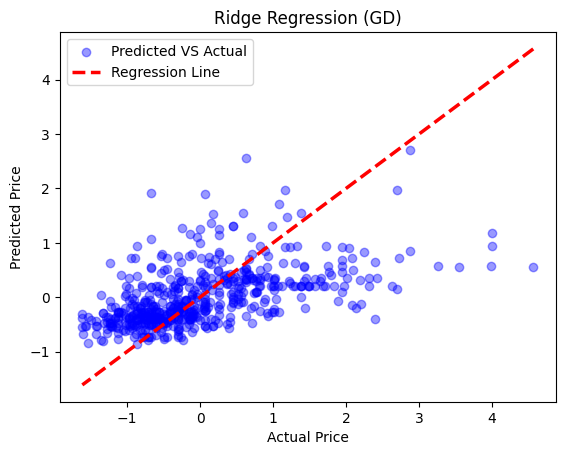

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

csv_data=pd.read_csv('Housing.csv')
# normalizing data for best usage
x_preNormalized = np.array(csv_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_PreNormalized = np.array(csv_data['price'])
# applying z-score normalization
x = (x_preNormalized-np.mean(x_preNormalized))/np.std(x_preNormalized)
y = (y_PreNormalized-np.mean(y_PreNormalized))/np.std(y_PreNormalized)

# GD algorithm
def Gradient_Descent_Algorithm(x,y,LearningRate, Lambda, n_iteration):
    n=len(y)
    # calculating beta cofficient
    # xTx
    x_transpose = np.transpose(x)
    x_transpose_x = np.dot(x_transpose, x)
    xTx_shape=np.shape(x_transpose_x)
    # Identity Matrix
    I = np.identity(xTx_shape[0])
    # Lambda.I
    Lambda_I=np.dot(Lambda,I)
    # (xTx+Lambda.I)^-1
    parameter_1 = np.linalg.inv((x_transpose_x+Lambda_I))
    # xTy
    parameter_2 = np.dot(x_transpose,y)
    # beta cofficient
    beta_cofficient=np.dot(parameter_1,parameter_2)

    # applying iterations in GD
    for _ in range(n_iteration):
        y_pred=np.dot(x,beta_cofficient)
        cost_function=y_pred-y
        # xT.cost_function
        parameter_1 = (1/n)*np.dot(x_transpose,cost_function)
        # (Lambda/n).beta_cofficient
        Lambda_by_n=Lambda/n
        parameter_2 = np.dot(Lambda_by_n,beta_cofficient)
        # gradient_descent_beta (gdb)
        gdb=parameter_1+parameter_2
        beta_cofficient -= LearningRate*gdb
    return beta_cofficient

new_beta_cofficient=Gradient_Descent_Algorithm(x,y,0.001,0.7,1000)
# predicting the values
y_prediction = np.dot(x,new_beta_cofficient)


r2 = r2_score(y, y_prediction)
mse = mean_squared_error(y, y_prediction)
print(r2)
print(mse)

# plotting
plt.scatter(y, y_prediction, color='blue',
            alpha=0.4, label='Predicted VS Actual')
plt.plot(y, y, 'r--', lw=2.5, label="Regression Line")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression (GD)')
plt.legend()
plt.show()